In [35]:
import os
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
data = pl.read_csv(
    '~/Documents/kazispaces/dsrc/py/finlytik-app/data/unprocessed_train.csv', infer_schema_length=0)


In [37]:
data.schema

{'ID': Utf8,
 'Customer_ID': Utf8,
 'Month': Utf8,
 'Name': Utf8,
 'Age': Utf8,
 'SSN': Utf8,
 'Occupation': Utf8,
 'Annual_Income': Utf8,
 'Monthly_Inhand_Salary': Utf8,
 'Num_Bank_Accounts': Utf8,
 'Num_Credit_Card': Utf8,
 'Interest_Rate': Utf8,
 'Num_of_Loan': Utf8,
 'Type_of_Loan': Utf8,
 'Delay_from_due_date': Utf8,
 'Num_of_Delayed_Payment': Utf8,
 'Changed_Credit_Limit': Utf8,
 'Num_Credit_Inquiries': Utf8,
 'Credit_Mix': Utf8,
 'Outstanding_Debt': Utf8,
 'Credit_Utilization_Ratio': Utf8,
 'Credit_History_Age': Utf8,
 'Payment_of_Min_Amount': Utf8,
 'Total_EMI_per_month': Utf8,
 'Amount_invested_monthly': Utf8,
 'Payment_Behaviour': Utf8,
 'Monthly_Balance': Utf8,
 'Credit_Score': Utf8}

In [38]:
def numberfy(val):
    val = val.strip("_")
    if len(val) > 0:
        return val


In [39]:
# Cast Age to Int and  Remove Outliers
data = data.with_columns(pl.col('Age').apply(
    lambda x: numberfy(x)).cast(pl.Int32))
data = data.with_columns(pl.when(pl.col('Age') < 0).then(pl.col('Age').median().over(['Customer_ID', 'Name'])).otherwise(
    pl.col('Age')).keep_name())
data = data.filter((pl.col('Age') > 0) & (pl.col('Age') < 100))


In [40]:
# Cast Annual_Income to Float
data = data.with_columns(pl.col('Annual_Income').apply(
    lambda x: numberfy(x)).cast(pl.Float32))

In [41]:
# Cast Monthly_Inhand_Salary to Float and  Remove Null values
data = data.with_columns(pl.col('Monthly_Inhand_Salary').cast(pl.Float32))
data = data.with_columns(pl.when(pl.col('Monthly_Inhand_Salary').is_null()).then(
    pl.col('Monthly_Inhand_Salary').max().over(['Customer_ID', 'Name'])).otherwise(pl.col('Monthly_Inhand_Salary')).keep_name())


In [42]:
# Cast Num_Bank_Accounts to Int and Remove Outliers
data = data.with_columns(pl.col('Num_Bank_Accounts').cast(pl.Int32))
data = data.with_columns(pl.when(pl.col('Num_Bank_Accounts') < 0).then(0).otherwise(
    pl.col('Num_Bank_Accounts')).keep_name()).filter(pl.col('Num_Bank_Accounts') <= 10 )  # .to_pandas().Annual_Income[0]
data = data.with_columns(
    pl.col('Num_Bank_Accounts').mean().over(['Customer_ID', 'Name']))


In [43]:
# Cast Num_Credit_Card to Int and Remove Outliers
data = data.with_columns(pl.col('Num_Credit_Card').cast(pl.Int32))
data = data.filter(pl.col('Num_Credit_Card') <= 10)
data = data.with_columns(
    pl.col('Num_Credit_Card').mean().over(['Customer_ID', 'Name']))


In [44]:
# Cast Interest Rate to Int and  Remove Outliers
data = data.with_columns(pl.col('Interest_Rate').cast(pl.Int32))
data = data.filter(pl.col('Interest_Rate') <= 10)
data = data.with_columns(
    pl.col('Interest_Rate').mean().over(['Customer_ID', 'Name']))


In [45]:
# Cast Num_of_Loan to Int and  Remove Outliers
data = data.with_columns(pl.col('Num_of_Loan').apply(
    lambda x: numberfy(x)).cast(pl.Int32))

data = data.filter((pl.col('Num_of_Loan') > 0) & (pl.col('Num_of_Loan') <= 100))

data = data.with_columns(pl.col('Num_of_Loan').mean().over(['Customer_ID', 'Name']))


In [46]:
# Cast Delay_from_due_date to Int and  Remove Outliers
data = data.with_columns(pl.col('Delay_from_due_date').apply(
    lambda x: numberfy(x)).cast(pl.Int32)).with_columns(pl.when(pl.col('Delay_from_due_date') < 0).then(0).otherwise(
        pl.col('Delay_from_due_date')).keep_name())


In [47]:
# Cast Num_of_Delayed_Payment to Int and  Remove Outliers
data = data.with_columns(pl.col('Num_of_Delayed_Payment').apply(
    lambda x: numberfy(x)).cast(pl.Int32))

data = data.filter((pl.col('Num_of_Delayed_Payment') > 0) & (pl.col('Num_of_Loan') <= 500))

data = data.with_columns(
    pl.col('Num_of_Delayed_Payment').mean().over(['Customer_ID', 'Name']))


In [48]:
# Cast Changed_Credit_Limit to Float and  Remove Outliers
data = data.with_columns(pl.col('Changed_Credit_Limit').apply(
    lambda x: numberfy(x)).cast(pl.Float32))

data = data.filter(pl.col('Changed_Credit_Limit') >0)

data = data.with_columns(pl.col('Changed_Credit_Limit').mean().over(['Customer_ID', 'Name']))


In [49]:
# Cast Num_Credit_Inquiries to Float
data = data.with_columns(pl.col('Num_Credit_Inquiries').apply(
    lambda x: numberfy(x)).cast(pl.Float32))
data = data.with_columns(
    pl.col('Num_Credit_Inquiries').mean().over(['Customer_ID', 'Name']))


In [50]:
# Cast Outstanding to Float
data = data.with_columns(pl.col('Outstanding_Debt').apply(
    lambda x: numberfy(x)).cast(pl.Float32))


In [51]:
# Cast Credit_Utilization_Ratio to Float
data = data.with_columns(pl.col('Credit_Utilization_Ratio').apply(
    lambda x: numberfy(x)).cast(pl.Float32))
data = data.with_columns(
    pl.col('Credit_Utilization_Ratio').mean().over(['Customer_ID', 'Name']))


In [52]:
# Cast Total_EMI_per_month to Float
data = data.with_columns(pl.col('Total_EMI_per_month').apply(
    lambda x: numberfy(x)).cast(pl.Float32))
data = data.with_columns(
    pl.col('Total_EMI_per_month').mean().over(['Customer_ID', 'Name']))


In [53]:
# Cast Amount_invested_monthly to Float
data = data.with_columns(pl.col('Amount_invested_monthly').apply(
    lambda x: numberfy(x)).cast(pl.Float32))
data = data.with_columns(
    pl.col('Amount_invested_monthly').mean().over(['Customer_ID', 'Name']))


In [54]:
# Cast Monthly_Balance to Float and Remove Outliers
data = data.with_columns(pl.col('Monthly_Balance').apply(
    lambda x: numberfy(x)).cast(pl.Float32))

data = data.filter(pl.col('Monthly_Balance') > 0)

data = data.with_columns(
    pl.col('Monthly_Balance').mean().over(['Customer_ID', 'Name']))


In [55]:
def agify(val):
    if val != "NA":
        val = val.replace(" ", "").split("Yearsand")
        years = int(val[0])
        months = int(val[1].replace("Months", ""))
        return years + (months/12)


In [56]:
# Cast Credit_History_Age to Float
data = data.with_columns(pl.col('Credit_History_Age').apply(
    lambda x: agify(x)).cast(pl.Float32))
data = data.with_columns(
    pl.col('Credit_History_Age').max().over(['Customer_ID', 'Name']))


In [57]:
def jobify(val):
    val = val.replace("_", "")
    if len(val) > 0:
        return val
    else:
        return "Other"


In [58]:
# Remove blanks from Occupation
data = data.with_columns(pl.col('Occupation').apply(
    lambda x: jobify(x)))


In [59]:
# Remove blanks from Credit_Mix
data = data.with_columns(pl.col('Credit_Mix').apply(
    lambda x: jobify(x)))


In [60]:
# Label Encode Credit_Score
data = data.with_columns(pl.when((pl.col('Credit_Score') == "Good") | (
    pl.col('Credit_Score') == "Standard")).then(pl.lit(0)).otherwise(pl.lit(1)).keep_name())


In [61]:
data = data.filter(pl.col("Payment_Behaviour") != "!@9#%8")


In [62]:
# data.select('Type_of_Loan')[0].to_pandas().Type_of_Loan[0].replace(" ", "").replace("and", "").split(",")

In [63]:
x= data.select('Customer_ID', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Delay_from_due_date', 'Credit_Score').unique(subset=['Customer_ID']).to_pandas()


In [64]:
x.shape

(3988, 23)

In [65]:
x.Credit_Score.value_counts(normalize=True)

0    0.88666
1    0.11334
Name: Credit_Score, dtype: float64

<AxesSubplot:ylabel='Frequency'>

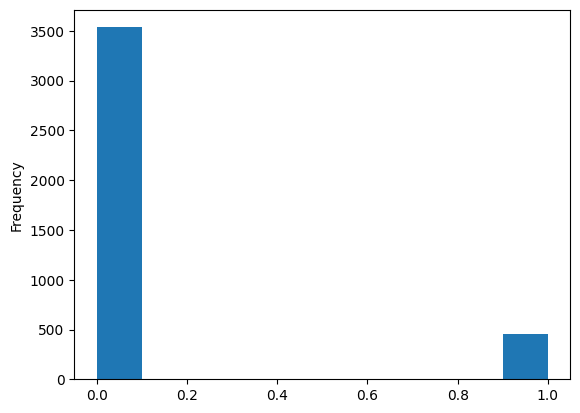

In [66]:
x.Credit_Score.plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

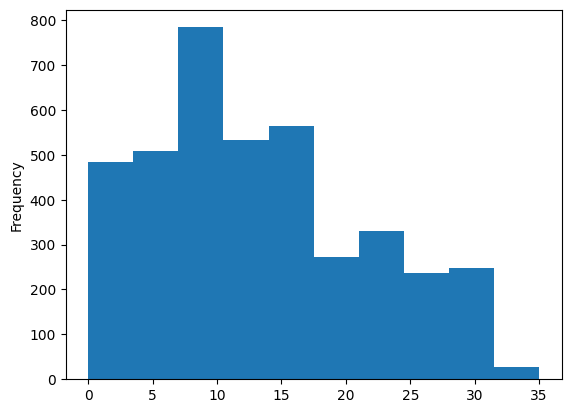

In [67]:
x.Delay_from_due_date.plot(kind='hist')

In [68]:
x = x[~x.Monthly_Inhand_Salary.isna()]
x = x[~x.Num_Credit_Inquiries.isna()]
x = x[~x.Credit_History_Age.isna()]
x = x[~x.Amount_invested_monthly.isna()]


In [69]:
x.to_csv("~/Documents/kazispaces/dsrc/py/finlytik-app/data/train.csv", index=False)
